In [ ]:
pip install opencv-contrib-python

In [ ]:
pip install caer

Reading images and video on open CV

reading images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image=cv2.imread("messi.jpg")
cv2.imshow("messi",image)
cv2.waitKey(0)
cv2.destroyAllWindows()


reading videos

In [ ]:
#capture=cv2.VideoCapture(0) #integers say video from carmera 0 usually web cam 1, 2, 3  #next cameras 
capture=cv2.VideoCapture("/media/ebinjosemathew/64f31d29-5be9-4872-ab4e-56a3474af899/Movies/Anime/Paprika/paprika.mkv")

while True: #use while loop and read the video frame by frame
    isTrue,frame=capture.read()
    cv2.imshow("video",frame)
    
    if cv2.waitKey(1) == ord("d"): #stops video play indefinely /if letter d is pressed then break out of the video
        print("breaking")
        break
        
capture.release()          #relase capture pointer 
cv2.destroyAllWindows()#destroy all windoes 

Resizing and rescalling

In [ ]:
def rescale_frame(frame,scale=0.75):         #by deafault 0.75
    width = int(frame.shape[1]* scale)        # [1] width
    height= int(frame.shape[0]* scale)       # [0] hieght
    dimension=(width,height)
    
    return cv.resize(frame,dimension,interpolation=cv.INTER_AREA)


capture=cv2.VideoCapture("/media/ebinjosemathew/64f31d29-5be9-4872-ab4e-56a3474af899/Movies/Anime/Paprika/paprika.mkv")

while True: #use while loop and read the video frame by frame
    isTrue,frame=capture.read()
    
    frame_resize=rescale_frame(frame)
    
    cv2.imshow("video",frame_resize)
    
    if cv2.waitKey(1) == ord("d"): #stops video play indefinely /if letter d is pressed then break out of the video
        print("breaking")
        break
        
capture.release()          #relase capture pointer 
cv2.destroyAllWindows()#destroy all windoes

In [ ]:
image=cv2.imread("messi.jpg")


image_resize=rescale_frame(image,0.5)


cv2.imshow("messi",image_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#for live videos
def changeres(width,hieght):
    capture.set(3,width)       #use 10 for brightness
    capture.set(4,hieght)    
    

In [ ]:
DRAWING SHAPES AND WRITTING TEXT

In [3]:
#making a blank image
blank = np.zeros((500,500,3),dtype="uint8") #hieght width and number of colour channels
cv2.imshow("black",blank)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Paint the image a certain colour

blank[200:300,333:36]=0,255,0                #green colour
cv2.imshow("green",blank)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#text

cv2.putText(blank,"HELLO",(255,255),cv2.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0),2) #thickness last one
cv2.imshow("text",blank)

cv2.waitKey(0)
cv2.destroyAllWindows()

ESSENTIAL FUNCTIONS IN OPEN CV

In [34]:
#grayscalling
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("gray",gray)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
#blur 
blur =cv2.GaussianBlur(image,(7,7),cv2.BORDER_DEFAULT) #kernal size should by odd hence 3,3(extent of blurring )

cv2.imshow("BLUR",blur)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
#edge cascade
canny=cv2.Canny(blur,125,175)                #display edges #pass blured image to reduce the edges

cv2.imshow("canny",canny )

cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
#dilating an image
dilate=cv2.dilate(canny,(7,7),iterations=5)

cv2.imshow("dilate",dilate)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
#eroding
eroded=cv2.erode(dilate,(3,3),iterations=10)

cv2.imshow("erode",eroded)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [32]:
#resize and crop image
resized=cv2.resize(image,(500,500)) #igores aspect ratio #use interpolation for better enlargement

cv2.imshow("resize",resized)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [33]:
#cropping

cropped=image[200:400,200:500]
cv2.imshow("cropped",cropped)

In [8]:
#translation (flipping image on its axis) shifting an image 
def translation(image, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions =(image.shape[1],image.shape[0])
    return cv2.warpAffine(image,transMat,dimensions)

# -x ..... left
# -y.......up
#  x........right
#  y..........down

translated = translation(image,100,-200)

cv2.imshow("translate",translated)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
#rotation

def rotate(image,angle,rotPoint=None):
    (height,width) =image.shape[:2]
    
    if rotPoint is None:
        rotPoint = (width//2,height//2)
        
    rotMat = cv2.getRotationMatrix2D(rotPoint ,angle, 1.0)    #1.0 is for scalling
    dimension= (width,height)
    
    return cv2.warpAffine(image,rotMat,dimension)

rotated= rotate(image,45)

cv2.imshow("rotate",rotated)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
#cv.resize
resized=cv2.resize(image,(500,500),interpolation = cv2.INTER_CUBIC)  #deafault for shrinking image interplilation

cv2.imshow("resize",resized)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
#Flipping
flip = cv2.flip(image,1)  #0 vert ,1 hor,-1 flip both hotizontal and vertical

cv2.imshow("flipped",flip)

cv2.waitKey(0)
cv2.destroyAllWindows()

CONTOURS DETECTION

In [8]:
contours,hirarchies= cv2.findContours(canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)}contour(s) found')
#hirarchies that cv uses
#cv2.RETR_LIST all contors
#cv2.RTR_EXTERNAL all external contors
#cv2.retere all hirarchical contors
# ---compress al contors to end point
#CHAIN_APPROX_NONE --- returns all the contors

588contour(s) found


In [5]:
#using threshold method to find countors
ret,thresh=cv2.threshold(gray,125,500,cv2.THRESH_BINARY)
#threshold binarize the image

cv2.imshow("thresh",thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()



contours,hirarchies= cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)}contour(s) found')

871contour(s) found


In [19]:
#display contors on a black image
blank = np.zeros(image.shape,dtype="uint8") #hieght width and number of colour channels
cv2.imshow("black",blank)

cv2.drawContours(blank,contours,-1,(0,0,255),2)

cv2.imshow("Contours drawn",blank)

cv2.waitKey(0)
cv2.destroyAllWindows()

#-1 specify draw all contours,2 thickness


COLOR SPACES

In [33]:
#BGR to gray scale done above
#BGR to HSV
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
cv2.imshow("HSV",hsv)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
#BGR TO LAB

lab=cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
cv2.imshow("HSV",lab)

cv2.waitKey(0)
cv2.destroyAllWindows()

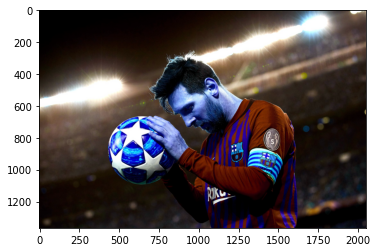

In [12]:
#in open cv color is show in BGR but outisde the library its show in RGB
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

#for all conversion has to go through BGR
#cant go from hsv to grayscale directly

COLOR CHANNELS

In [15]:
b,g,r=cv2.split(image)

cv2.imshow("blue",b)
cv2.imshow("green",g)
cv2.imshow("red",r)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
merge=cv2.merge([b,g,r])

cv2.imshow("merge",merge)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
#reconstruct image for actual picture involved in that channel

blue=cv2.merge([b,blank,blank])
green=cv2.merge([blank,g,blank])
red=cv2.merge([blank,blank,blank])

cv2.imshow("blue",blue)
cv2.imshow("green",green)
cv2.imshow("red",red)


cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.1) /tmp/pip-req-build-jr1ur_cf/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 7


smotthing and blurring
done to reduce noise 

In [4]:
#blurring

average=cv2.blur(image,(7,7))
cv2.imshow("blur",average)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#gaussian blur
#(pixel are given wieghts)
#less bluring than averaging
#done above

In [7]:
#median bluring #not efective in high kernal sizes 
median=cv2.medianBlur(image,(3))
cv2.imshow("blur",median)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#bilateral
bilateral=cv2.bilateralFilter(image,5,15,15)   #image,diameter,color sigma(more?more color consider bluring),space sigma
cv2.imshow("bilateral",bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()

BITWISE OPERATOR

In [15]:
blank=np.zeros((400,400),dtype="uint8")

rectangle=cv2.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle=cv2.circle(blank.copy(),(200,200),200,255,-1)

cv2.imshow("circle",circle)
cv2.imshow("rectangle",rectangle)

cv2.waitKey(0)
cv2.destroyAllWindows()

#BITWISE AND

bitwise_and=cv2.bitwise_and(rectangle,circle)
cv2.imshow("bitwise_and",bitwise_and)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#BITWISE OR
bitwise_or=cv2.bitwise_or(rectangle,circle)
cv2.imshow("bitwise_or",bitwise_or)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
#BITWISE OR
bitwise_xor=cv2.bitwise_xor(rectangle,circle)
cv2.imshow("bitwise_xor",bitwise_xor)


cv2.waitKey(0)
cv2.destroyAllWindows()

MASKING

In [31]:
#focusing on certain location

blank=np.zeros(image.shape[:2],dtype="uint8")

masked=cv2.circle(blank,(image.shape[1]//2,image.shape[0]//2),200,255,-1)
cv2.imshow("maked",masked)

masked_image=cv2.bitwise_and(image,image,mask=masked)
cv2.imshow("masked",masked_image)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(0)
cv2.destroyAllWindows()

Histogram

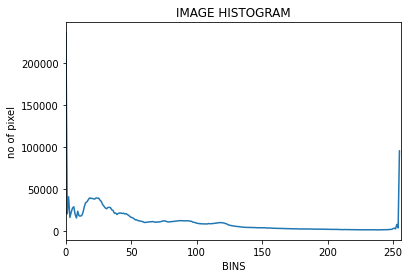

In [28]:

Hist=cv2.calcHist([image],[0],None,[256],[0,256])

plt.figure()
plt.title("IMAGE HISTOGRAM")
plt.xlabel("BINS")
plt.ylabel("no of pixel")
plt.plot(Hist)
plt.xlim([0,256])
plt.show()


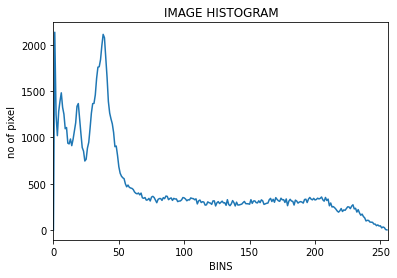

In [3]:
#gray scalling




#masked histogram
blank=np.zeros(gray.shape[:2],dtype="uint8")

masked=cv2.circle(blank,(gray.shape[1]//2,image.shape[0]//2),200,255,-1)
cv2.imshow("maked",masked)

masked_image=cv2.bitwise_and(gray,gray,mask=masked)
cv2.imshow("masked",masked_image)


Hist=cv2.calcHist([gray],[0],masked_image,[256],[0,256])

plt.figure()
plt.title("IMAGE HISTOGRAM")
plt.xlabel("BINS")
plt.ylabel("no of pixel")
plt.plot(Hist)
plt.xlim([0,256])
plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()

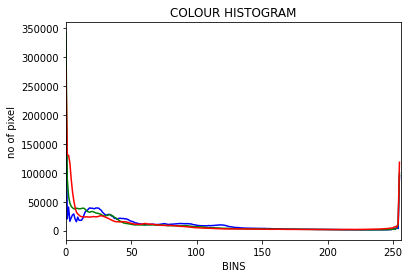

In [12]:
#colour histogram
colors=('b','g','r')
for i,col in enumerate(colors):
    Hist=cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(Hist,color=col)
    plt.xlim([0,256])
plt.title("COLOUR HISTOGRAM")
plt.xlabel("BINS")
plt.ylabel("no of pixel")
plt.show()

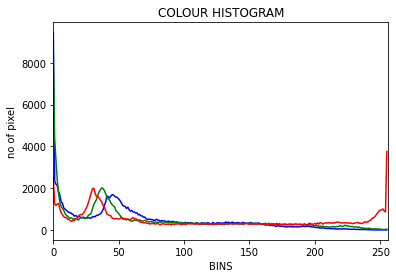

In [14]:
#MASKED COLOUR HISTOGRAM
colors=('b','g','r')
for i,col in enumerate(colors):
    Hist=cv2.calcHist([image],[i],masked_image,[256],[0,256])
    plt.plot(Hist,color=col)
    plt.xlim([0,256])
plt.title("COLOUR HISTOGRAM")
plt.xlabel("BINS")
plt.ylabel("no of pixel")
plt.show()

TRESHHOLDING

In [18]:
#simple thresholding
threshold,thresh=cv2.threshold(gray,150,255,cv2.THRESH_BINARY)
cv2.imshow("simple threshold",thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

#inverse thresholding
threshold,thresh=cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV)
cv2.imshow("simple threshold",thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
#adaptive Thrsholding
adaptive_thresh=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,3)
cv2.imshow("Adaptive threshold",adaptive_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

EDGE DETECTION

In [27]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("gray",gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

#Laplaction
lap=cv2.Laplacian(gray,cv2.CV_64F)
lap=np.uint8(np.absolute(lap))
cv2.imshow("laplaction",lap)


#sobel
sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0)
sobely=cv2.Sobel(gray,cv2.CV_64F,0,1)
combine_sobel=cv2.bitwise_or(sobelx,sobely)

cv2.imshow("sobelx",sobelx)
cv2.imshow("sobely",sobely)
cv2.imshow("combine_sobel",combine_sobel)

cv2.waitKey(0)
cv2.destroyAllWindows()